Project 1: 

Vous êtes nouvel embauche chez CoolCorp, une startup qui spécialise
dans l'analyse des désastres maritimes.  Un nouveau client, White Star
Lines, se trouve face à un procès à travers le temps, affaire délicat.
Votre chef vous demande, en tant que seul data scientist chez
CoolCorp, d'analyser les données `*.csv`.  WSL a déjà engagé un expert
pour annoter une partie des données (`test.csv`) avec la survie ou pas
des passagers.

1ère étape: Ouverture des fichiers csv

la librairie pandas permets une ouverture facile de fichiers csv par la fonction read_csv() sous le format d'un dataframe qui permet d'utiliser un certain nombres de fonctions pré-implémentées dans l'objet python créé (c'est à dire 'dfTrain')

voir http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

Pour l'instant seul le fichier 'train.csv' nous interesse puisque le fichier 'test.csv' est censé être traité par un autre expert. 

In [194]:
# import de la librairie pandas qui sera appelée par l'acronyme 'pd' dans le corps du code
import pandas as pd

# header = 0 indique la présence de titres sur chaque colonne
dfTrain = pd.read_csv('train.csv', header=0)

2nde étape: observation du dataset

les fonctions spécifiques au format dataframe et présentées dans pandas.ipynb seront utiles pour cette étape:
* df.head()
* df.dtypes
* df.info()
* df.describe()


In [195]:
# .head() affiche les 5 premieres lignes du dataframe
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


On peut ainsi se donner une idée des données présentent et que ces 12 colonnes représentent:

* PassengerId : un identifiant unique pour chaque passager
* Survived : une variable booléenne qui prends la valeur 0 : n'a pas survécu ou 1 : a survécu
* Pclass : la classe de voyageur dans laquelle se trouvait le passager (1 : 1ere classe, etc)
* Name : le nom complet du passager
* Sex : une variable booléenne qui détermine le sexe des passagers (male / female)
* Age : l'age du passager
* SibSp: Nombre de frères, soeurs ou époux/épouse
* Parch: Nombre de Père/Mère
* Ticket : numéro de ticket de passager
* Fare: Prix du ticket de passager
* Cabin: Numéro de cabine (attention les passagers de 3ième classe n'ont probablement pas de cabine personnelle)
* Embarked: Premiere lettre du lieu d'embarcation (S , C , etc)



In [196]:
# informe de la nature des données
dfTrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [197]:
# résumé plus complet du dataframe:  
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Renseigne sur:
* la nature de l'objet analysé (dataframe)
* le nombre de lignes (891)
* nombre d'observations par colonnes (attention colonne "Age" et "Cabin" ne sont pas entièrement renseignées)
* Si la colonne est entierement vide (null / non-null)
* tous les types de données présents dans ce dataframe et leur nombre en colonnes (float64(2), int64(5), object(5))
* l'usage de la mémoire pour conserver ce dataframe


In [198]:
# Résumé statisque des données présentes dans le dataframe
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Attention: ne prends en compte que les variables numériques.

Les données non renseignées (NaN) ou valeurs abérrantes influent sur ces calculs.

Nous indique:

* count : nombre total d'obersavations
* mean : moyenne des observations
* std : standard deviation (écart type)
* min : valeur minimale des observations
* 25% : 1er quartile des obervations (valeur butoire qui sépare 25% des observations d'un coté et 75% de l'autre)
* 50% : 2nd quartile (ou médiane) des observations (valeur butoire qui sépare le dataset en deux parties égales)
* 75% : 3ime quartile des obervations (valeur butoire qui sépare 75% des observations d'un coté et 25% de l'autre)
* max : valeur maximale des observations


3ième étape : nettoyage des données

Une étape cruciale qui permet d'éliminer toute observation non renseignée ou abérrante et qui pourrait fausser l'analyse des données

Nous allons contruire des fonctions dont le but sera de retourner le nom des colonnes qui contiennent des valeurs 'NaN' : valeurs non attribués (non renseignées)

In [199]:
# Necessite la librairie math pour importer uniquement la fonction isnan
from math import isnan 

# fonction qui retourne si une colonne contient au moins une valeur NaN
# ATTENTION isnan() n'accepte que des valeurs de type numérique
def isNanInColumn(df,columnName):
    # nous allons utiliser une boucle for
    for obs in df[columnName]:
            if isnan(obs) == True:
                return True
        
# fonction qui ne garde que les noms de colonnes qui sont de type float ou int        
def selectColumnFloat(df,columnNames):
    columnNameFloat = []
    for column in columnNames:
        if df[column].dtypes == "int64" or df[column].dtypes == "float64":
            columnNameFloat.append(column)
    return columnNameFloat

# fonction qui scan chaque colonne depuis une liste de noms pour savoir si ces colonnes contiennent au moins un NaN
def findColumnWithNaN(df,floatColumns):
    columnList = []
    for column in floatColumns:
        if isNanInColumn(df,column) == True:
            columnList.append(column)
    return columnList



    

Appliquons maintenant ces fonctions au jeu de données (dfTrain) que nous avons:

In [200]:
# Selection de tous les noms de colonnes dans dfTrain
columnNames = list(dfTrain.columns.values)

# Restriction aux seules colonnes qui sont numériques
floatColumns = selectColumnFloat(dfTrain,columnNames)

# retourne le nom des colonnes contenant au moins un NaN
findColumnWithNaN(dfTrain,floatColumns)

['Age']

En ce qui concerne les valeurs non attribuées, seule la colonne 'Age' contient des valeurs NaN, ce qui est plutot une bonne nouvelle!

Nous pouvons maintenant remplacer ces valeurs grace au code fourni dans Pandas.ipynb

In [201]:
import numpy as np

# Ajouter une colonne Gender qui contiendra une variable booléenne plus facile à manupuler :
dfTrain['Gender'] = ""

# En binaire :
dfTrain['Gender'] = dfTrain['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Création d'un objet de deux lignes et 3 colonnes qui contiendra les medianes des ages pour chaque sexe et classe de passagers
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = dfTrain[(dfTrain['Gender'] == i) & \
                              (dfTrain['Pclass'] == j+1)]['Age'].dropna().median()

# Création d'un dictionnaire contenant ces informations selon le sexe et la classe des passagers
dico_median = {1: ["Femme","1ere Classe", median_ages[0,0]]
                ,2: ["Femme","2nde Classe", median_ages[0,1]]
                ,3: ["Femme","3ieme Classe", median_ages[0,2]]
                ,4: ["Homme","1ere Classe", median_ages[1,0]]
                ,5: ["Homme","2nde Classe", median_ages[1,1]]
                ,6: ["Homme","3ieme Classe", median_ages[1,2]]}

# Création d'une table présentant ces informations de médiane selon le sexe et la classe des passagers
print "{:<8} {:<15} {:<10}".format('Sexe','Classe','Age Median')
for k, v in dico_median.iteritems():
    Sexe, Classe, Age = v
    print "{:<8} {:<15} {:<10}".format(Sexe, Classe, Age)
    

Sexe     Classe          Age Median
Femme    1ere Classe     35.0      
Femme    2nde Classe     28.0      
Femme    3ieme Classe    21.5      
Homme    1ere Classe     40.0      
Homme    2nde Classe     30.0      
Homme    3ieme Classe    25.0      


On peut clairement voir que l'age médian change drastiquement à la fois entre les hommes et les femmes mais également entre les différentes classes de passagers.

Prendre la médiane globale des passagers pour remplir les valeurs d'age non attribuées dans le dataset fournirait une information moins juste que de prendre la médiane calculée selon le sexe et la classe de passagers.

Pour éviter de réécrire par inadvertance des valeurs dans la colonne 'Age', nous allons créer une copie de cette colonne dans le dataset et lui appliquer les modifications qui vont replacer les NaN par des valeurs médiane: 

In [202]:
# On commence avec une copie :
dfTrain['AgeFill'] = dfTrain['Age']

# On construire une boucle for imbriquée qui permet de selectionner les valeurs NaN 
# en fonction du sexe et de la classe de passagers ainsi que leur attribuer la nouvelle valeur médiane correspondante :
for i in range(0, 2):
    for j in range(0, 3):
        dfTrain.loc[ (dfTrain.Age.isnull()) & (dfTrain.Gender == i) & 
                (dfTrain.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]

# Observation de la correction effectuée sur 10 valeurs:
print dfTrain[ dfTrain['Age'].isnull() ][['Age','AgeFill']].head(10)

# On peut maintenant vérifier que la colonne AgeFill ne contient plus de valeurs NaN:
print dfTrain.loc[dfTrain.AgeFill.isnull()]


    Age  AgeFill
5   NaN     25.0
17  NaN     30.0
19  NaN     21.5
26  NaN     25.0
28  NaN     21.5
29  NaN     25.0
31  NaN     35.0
32  NaN     21.5
36  NaN     25.0
42  NaN     25.0
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Gender, AgeFill]
Index: []


La vérification produit un dataframe vide lors de la recherche de valeurs NaN dans la colonne AgeFill, on peut donc en conclure que notre procédure de correction a été couronnée de succès!

Il faut continuer le nettoyage de données pour tester si des valeurs abérrantes sont présentes:

Pour ce faire, nous allons d'abord créer un nouveau dataset dont les colonnes 'Age' et 'Sex' et 'Ticket' seront supprimées car elles n'apportent pas d'information facilement manipulable ou interprétable.

On peut à nouveau utiliser la fonction .describe() pour analyser le comportement statistique des données et potentiellement repérer si des valeurs abérrantes sont présentes.

exemples: Un age négatif ou au dela de 100 ans serait louche.

In [203]:
# Nettoyage des colonnes non utilisées
dfClean = dfTrain.drop(['Sex', 'Ticket', 'Age']
                   ,axis=1)

# Nouvelle analyse statistique
dfClean.describe()


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208,0.647587,29.112424
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429,0.477989,13.304424
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,21.500000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000,26.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,36.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,80.000000


On peut observer grace à cette table que:

* le nombre de frères / soeurs / époux / épouse maximal était de 8, ce qui semble une valeur possible;
* le nombre de parents/enfants maximal présents était de 6, ce qui semble possible;
* le coût du billet varie de 0 à 512.33, un billet d'une valeur nulle peut etre concevable à cette époque si la personne s'engage à travailler à bord du ferry. En revanche, l'écart avec le maximum de 512.32 est assez considérable et il serait intéressant d'observer plus en details la distribution du prix du billet.
* l'age ne présente pas de valeurs abérrantes, les enfants de moins d'un an sont enregistrés par une décimale entre 0 et 1. Le passager le plus agé avait 80 ans. A t'il survécu ?

Pour avancer dans la compréhension du dataset, nous pouvons construire des histogrammes qui vont présenter la distribution des valeurs de chaque variable:

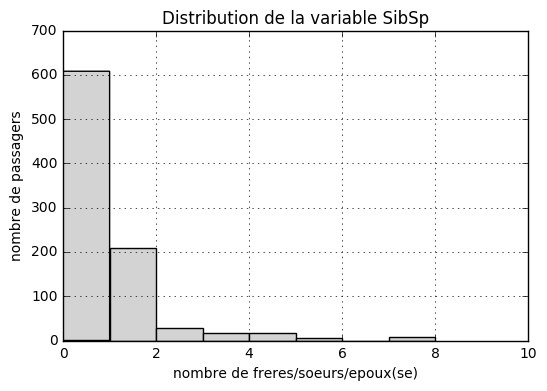

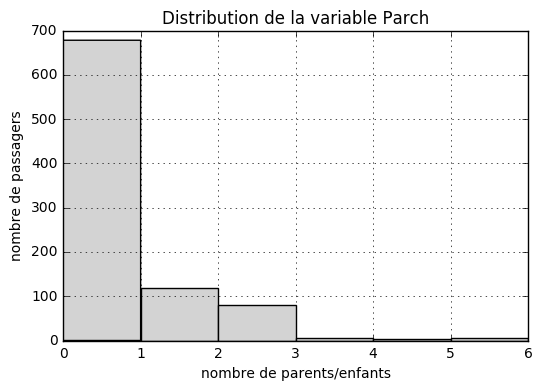

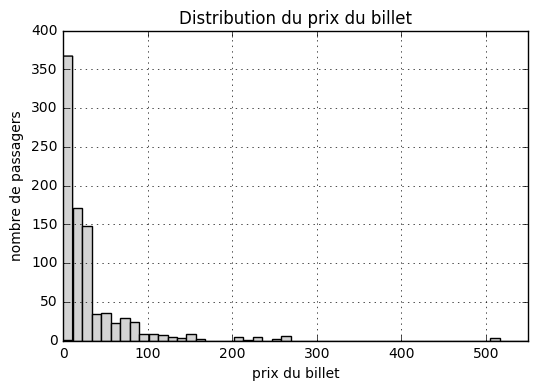

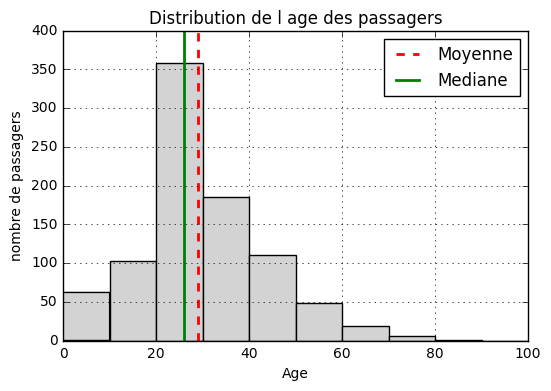

In [204]:
import matplotlib.pyplot as plt

plt.figure()  
 

dfClean.SibSp.hist(bins=8,color="lightgrey") 
plt.axis([0, 10, 0, 700]) 
plt.title('Distribution de la variable SibSp')  
plt.xlabel('nombre de freres/soeurs/epoux(se)')  
plt.ylabel('nombre de passagers')
plt.show()


dfClean.Parch.hist(bins=6,color="lightgrey") 
plt.axis([0, 6, 0, 700]) 
plt.title('Distribution de la variable Parch')  
plt.xlabel('nombre de parents/enfants')  
plt.ylabel('nombre de passagers')
plt.show()

binBoundaries = np.linspace(0,550,50)
dfClean.Fare.hist(bins=binBoundaries,color="lightgrey")  
plt.axis([0, 550, 0, 400])  
plt.title('Distribution du prix du billet')  
plt.xlabel('prix du billet')  
plt.ylabel('nombre de passagers')
plt.show()

binBoundaries = np.linspace(0,100,11)
dfClean.AgeFill.hist(bins=binBoundaries,color="lightgrey") 
plt.axvline(dfClean.AgeFill.mean(), color='red', linestyle='dashed', linewidth=2,label="Moyenne")
plt.axvline(dfClean.AgeFill.median(), color='green', linestyle='solid', linewidth=2,label="Mediane")
plt.axis([0, 100, 0, 400])  
plt.title('Distribution de l age des passagers')  
plt.xlabel('Age')  
plt.ylabel('nombre de passagers')
plt.legend()
plt.show()




Les histogrammes nous montrent globalement ce qui était préssenti par la table de statistiques pour les variables SibSp et Parch:
* Une majorité des passagers ne voyagaient pas en famille mais plutot individuellement.
* La distribution du prix du billet est étonnante, le mode (la classe la plus représentée) est représenté par les passagers qui n'ont pas payé leur ticket. Il y a ensuite un écart considérable entre la plupart des valeurs élevées situées entre 200 et 300 puis la valeur maximale à 512.
* La distribution de l'age est quasiment symétrique (moyenne et médiane sont proches) avec un léger décalage vers les personnes plus agées. Les enfants n'étaient donc pas surreprésentés dans la population des passagers.


In [205]:
# Retrouvons notre doyen:
dfClean[dfClean.AgeFill == max(dfClean.AgeFill)]



,PassengerId,Survived,Pclass,Name,SibSp,Parch,Fare,Cabin,Embarked,Gender,AgeFill
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,0,30.0,A23,S,1,80.0


In [206]:
# et notre mystérieux passager au prix du billet exhorbitant
dfClean[dfClean.Fare == max(dfClean.Fare)]

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Fare,Cabin,Embarked,Gender,AgeFill
258,259,1,1,"Ward, Miss. Anna",0,0,512.3292,NaN,C,0,35.0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,1,512.3292,B51 B53 B55,C,1,36.0
737,738,1,1,"Lesurer, Mr. Gustave J",0,0,512.3292,B101,C,1,35.0


Il y aurait en fait plusieurs personnes qui ont payé un billet aussi cher!

Il est premièrement notable que ces passagers ne partagent pas à première vue de liens de parenté. Ils sont néanmoins tous en première classe (ce qui semble raisonnable pour payer aussi cher).

On remarque également que Miss Anna Ward n'a pas de cabine enregistrée alors que Mr Thomas Drake Martinez occupe apparement trois cabines!

En une recherche rapide sur le net on trouve ce site: 
https://www.encyclopedia-titanica.org/cabins.html

On peut y voir des informations supplémentaires très intéressantes concernant nos passagers d'exception:

B-51-53-55 	Cardeza, Mrs James Warburton Martinez  
Ward, Miss Anna [maid to Mrs Cardeza] 	See also B-101
Cardeza, Mr Thomas Drake Martinez

B-101 (?) 	Lesurer, Mr Gustave [manservant to Mr Cardeza]
Ward, Miss Anna [maid to Mrs Cardeza] 	Cave List / Speculation 	

Anna Ward may have occupied B-101, if so then she would have berthed with Gustave Lesneur, a possibility but it is perhaps more likely that she would have occupied the same cabin as Mrs Cardeza (q.v.).

Et en cherchant sous wikipedia pour Cardeza, Mrs James Warburton Martinez :
https://fr.wikipedia.org/wiki/Charlotte_Drake_Cardeza
Le 10 avril 1912, Charlotte Drake Cardeza embarque sur le Titanic avec son fils, sa femme de chambre et son valet. Ils occupent l'une des deux suites « des millionnaires » sur le pont B. Ces suites sont pourvues de deux chambres, un salon, une salle de bain, un dressing room et une promenade privée de quinze mètres, et sont les plus luxueuses et les plus chères à bord. 


Miss Ward et Mr Lesurer sont donc des serviteurs employés par Mrs Martinez et son fils alors que l'on ne trouve pas de Mrs Martinez lorsque l'on recherche un prix de billet de £512. Nous verrons si nous arriverons a retrouver Mrs Martinez par la colonne 'Name'.

S'agissant d'une grande fortune de cette époque, il est possible que la location de deux suites sur le titatic engendre de telles dépenses. On ne peut donc pas conclure à des valeurs abérrantes.

In [207]:
# Retrouvons Mrs Cardeza, Mrs James Warburton Martinez
for i,k in enumerate(dfClean.PassengerId):
    if (dfClean.Name[i][0] == 'C') & (dfClean.Pclass[i] == 1) & (dfClean.Gender[i] == 0):
        print dfClean.Name[i]
        

Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Chibnall, Mrs. (Edith Martha Bowerman)
Cherry, Miss. Gladys
Carter, Miss. Lucile Polk
Crosby, Miss. Harriet R
Cleaver, Miss. Alice
Carter, Mrs. William Ernest (Lucile Polk)
Chambers, Mrs. Norman Campbell (Bertha Griggs)
Compton, Miss. Sara Rebecca


Nous n'avons retrouvé aucune Cardeza, Mrs James Warburton Martinez en faisant une recherche sur la 1ère lettre du nom apparaissant dans le registre pour la 1ère classe et portant sur les femmes.

En cherchant les passageres commencant par 'M' pour Martinez ou 'D' pour Drake son nom de jeune fille, ou en selectionnant les hommes, on obtient le meme resultat.

Il s'agit donc surement d'un problème de registre de bord qui ne rends apparemment pas compte de la présence de cette personne à bord du Titanic. 

4ieme Etape: L'analyse de données
    
Nous avons maintenant un dataset que nous assumons être suffisamment nettoyé pour pouvoir commencer une analyse statistique.

Nous allons maintenant explorer la possibilité de créer un modèle linéaire entre deux variables. Rien ne nous empeche de revenir plus tard sur le nettoyage des données si nous observons graphiquement des valeurs qui nous semblent abérrantes.

Intuitivement, nous faisons l'hypothèse que l'age et le prix du ticket vont etre liés. Nous pensons que de jeunes passagers seront plus désargentés que de vieux passagers et donc le prix du billet augmentera lorsque les passagers seront agés.

Pour tester cette hypothèse, nous allons construire un modèle de regression linéaire, il ya plusieurs façons de le faire:

* en utilsant la librairie numpy
* en utilisant la librairie scipy
* en utilisant la librairie sklearn


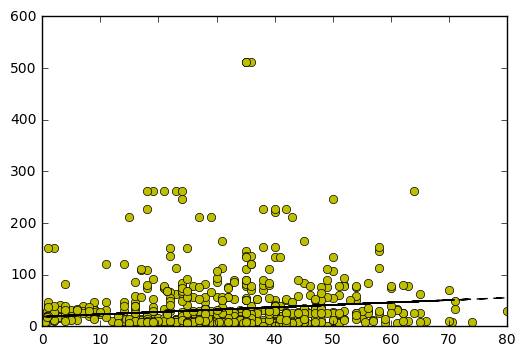

In [208]:
# Par l'utilisation de numpy:

# On determine les variables x (age des passagers) et y (cout du billet)
x = dfTrain["AgeFill"]
y = dfTrain["Fare"]

# On utilise la fonction polyfit pour ajuster le modèle linéaire aux données
fit = np.polyfit(x,y,1)

# On établit la prédiction des y en fonction des valeurs de x par le modèle linéaire
fit_fn = np.poly1d(fit) 

# On importe la librairie matplotlib pour pouvoir observer graphiquement la relation linéaire
import matplotlib.pyplot as plt

# On utilise la fonction plot pour ouvrir une instance graphique avec pour paramètres x, y et fit_fn(x) : les prédictions de y 
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
# On affiche le graphique
plt.show()



r-squared: 0.0150534439274


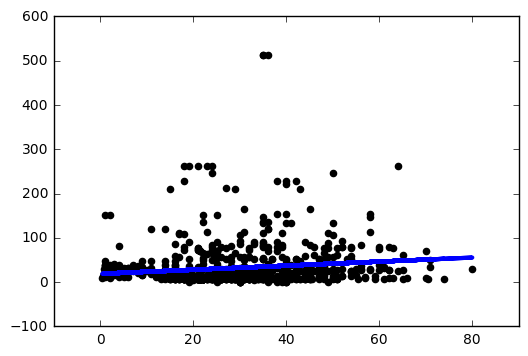

In [209]:
# Par l'utilisation de la librairie scipy

from scipy import stats
import numpy as np

x = dfTrain["AgeFill"]
y = dfTrain["Fare"]

# On utilise la fonction linregress qui retourne 5 valeurs:
# slope
# intercept
# r_value
# p_value
# std_err

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# On affiche le r carré qui évalue la force de la relation linéaire
print "r-squared:", r_value**2

# On calcule les prédictions de y par l'équation d'une relation linéaire
yFitted = slope*x + intercept 
    
# On dessine un nuage de points ayant pour coordonnées x et y 
plt.scatter(x, y,  color='black')
# On dessine la droite de regression formée par les coordonnées de x et les prédictions de y
plt.plot(x, yFitted, color='blue', linewidth=3)
# on affiche le graphique
plt.show()

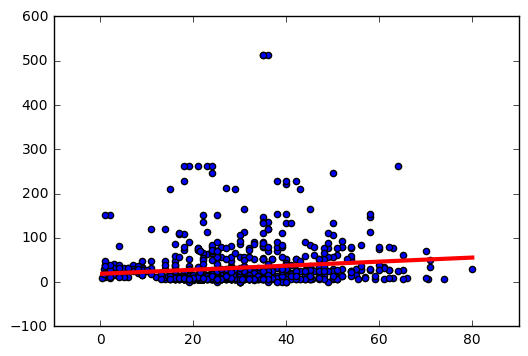

In [210]:
# Par l'utilisation de la librairie sklearn

from sklearn import datasets, linear_model

x = dfTrain["AgeFill"]
y = dfTrain["Fare"]

# On initialise un objet contenant le modèle linéaire
regr = linear_model.LinearRegression()

# On ajuste le modèle sur le dataset
regr.fit(x[:,np.newaxis], y)

# On créé un objet x_test qui représente les valeurs de x dans un espace linéaire
x_test = np.linspace(np.min(x), np.max(x), 100)

# Visualisation de la relation linéaire:

plt.scatter(x,y)
plt.plot(x_test, regr.predict(x_test[:,np.newaxis]), color='red', linewidth=3)
plt.show()



On voit par les graphiques et par la valeur de r² que ces regressions linéaires sont peu appropriées pour décrire la relation entre l'age et le prix du ticket pour l'ensemble des passagers.

Voyons ce qui se passe si nous ne prenons comme échantillon que les femmes de plus de 18 ans en 3ième classe et accompagnées par au moins deux parents (ou enfants):

In [211]:
# cette cellule permet de tester plusieurs échantillons d'intérêt avant de garder celui (ou ceux) 
# qui nous semble le plus approprié pour tester une regression linéaire 

dfForLinearRegr = dfClean[ (dfClean['Gender'] == 0) 
                      & (dfClean['AgeFill'] > 18.0) 
                      & (dfClean['Pclass'] == 3.0) 
                      #& (dfTrain['Embarked'] == "S") # cette condition n'est pas présentement testée
                      & (dfClean['Parch'] > 2)
                      & (dfClean['SibSp'] > -1)
                
                     ]


r-squared: 0.501905176825


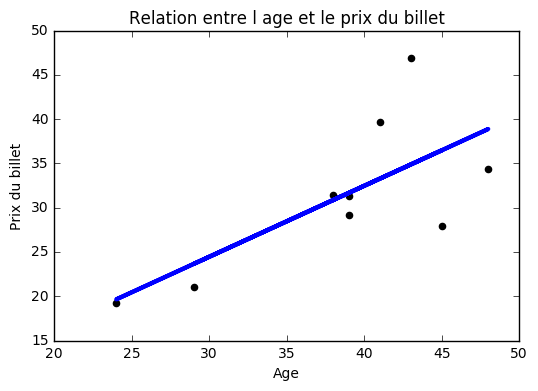

In [212]:
# Testons à nouveau le modèle linéaire sur cette échantillon: 

x = dfForLinearRegr["AgeFill"]
y = dfForLinearRegr["Fare"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print "r-squared:", r_value**2

yFitted = slope*x + intercept 
    
# Visualisation des données
plt.scatter(x, y,  color='black')
plt.plot(x, yFitted, color='blue', linewidth=3)
plt.title('Relation entre l age et le prix du billet')  
plt.xlabel('Age')  
plt.ylabel('Prix du billet')
plt.show()

Nous commencons ici à dégager une relation interprétable:

Une femme plus jeune avait tendance à payer moins cher son billet qu'une femme plus agée lorsqu'elle voyageait en 3ième classe et qu'elle était accompagnée par deux parents ou enfants.

Néanmoins cette relation a été construite sur 9 points de données, ce qui est peu pour en tirer une conclusion.

Nous pouvons maintenant essayer un modèle de regression logistique qui va nous permettre d'observer les relations qui existe avec les variables catégorielles comme par exemple la survie des passagers.

On va donc pouvoir commencer a s'interroger sur les causes de la survie de certains passagers et du décès des autres.    

In [213]:
from sklearn.cross_validation import train_test_split, cross_val_score

# On créé les variables qui vont servir à entrainer le modèle
X_train = dfClean['Pclass'].reshape(-1, 1)
y_train = dfClean['Survived'].reshape(-1, 1)
y_train = np.ravel(y_train)

# Importation du second fichier test.csv pour tester notre modèle logistique
dfTest = pd.read_csv('test.csv', header=0)
X_test = dfTest['Pclass'].reshape(-1, 1)

In [214]:
from sklearn.linear_model.logistic import LogisticRegression

# On entraine le modele sur le dataset train
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# et on prédit la survie dans test
predictions = classifier.predict(X_test)

In [215]:

# Création d'une liste PclassList qui contiendra les valeurs de Pclass
PclassList = []
for i,x in enumerate(X_test):
    PclassList.append(X_test[i,0])

# Création d'une liste PredictList qui contiendra les prédictions
PredictList = []
for i,pred in enumerate(predictions):
    PredictList.append(predictions[i])
    
    
#On créé un dictionnaire 'preDict' qui servir à nourrir un dataframe en Pandas qui sera plus facile à manipuler      
        
preDict = {'PClass' : pd.Series(PclassList)
     ,'Predict' : pd.Series(PredictList)}
    
# On créé le dataframe 
dfPredict = pd.DataFrame(preDict)   

dfPredict[dfPredict.Predict == 1].head()

,PClass,Predict
11,1,1
12,1,1
14,1,1
20,1,1
22,1,1


En modélisant la survie des passagers uniquement avec la colonne 'Pclass', seuls les passagers en 1ère classe survivent d'après ce modèle. La capacité d'adaptation de ce modèle est donc assez faible puisque ce résultat est éloigné de la réalité:

In [216]:
dfTrain[['Survived','Pclass']].head(10)

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
5,0,3
6,0,1
7,0,3
8,1,3
9,1,2


On voit ici que des passagers en 2ième et 3ième classe ont survécu, de ce fait ce modèle ne prédit pas bien la survie des passagers. Pour améliorer ce modèle nous pouvons y inclure plus de variables catégorielles de manière à affiner le résultat prédictif.

Nous allons maintenant convertir les colonnes 'Fare' et 'Age' de manière à avoir des variables catégorielles qui pourront etre intégrées dans une regression logistique multiple, les catégories seront déterminées par les valeurs interquartiles que nous avons vu dans .describe() de manière à obtenir des échantillons de taille équivalente dans chaque catégorie:

* Pour la colonne 'Fare', on peut créer une nouvelle colonne qui prendra pour valeur 0 pour les billets de £0 à £8, 1 pour les billets de £8 à £15, 2 de £15 à £31 et 3 plus les billets à plus de £31.
* Pour la colonne 'Age', on va créer une nouvelle variable qui aura plusieurs catégories selon des tranche d'age, 0: 0 à 21 ans, 1: 21 à 26 ans, 2: 26 à 36 ans, 3: 36 à 80 ans

In [217]:
# création des copies
dfClean['FareCat'] = dfClean['Fare']
dfClean['AgeCat'] = dfClean['AgeFill']

# Transformation des valeurs en catégories
dfClean.loc[dfClean['Fare'] <= 8, 'FareCat'] = 0
dfClean.loc[(dfClean['Fare'] > 8) & (dfClean['Fare'] <= 15) , 'FareCat'] = 1
dfClean.loc[(dfClean['Fare'] > 15) & (dfClean['Fare'] <= 31) , 'FareCat'] = 2
dfClean.loc[(dfClean['Fare'] > 31), 'FareCat'] = 3

dfClean.loc[dfClean['AgeFill'] <= 21, 'AgeCat'] = 0
dfClean.loc[(dfClean['AgeFill'] > 21) & (dfClean['AgeFill'] <= 26) , 'AgeCat'] = 1
dfClean.loc[(dfClean['AgeFill'] > 26) & (dfClean['AgeFill'] <= 36) , 'AgeCat'] = 2
dfClean.loc[(dfClean['AgeFill'] > 36), 'AgeCat'] = 3

# Tableau récapitulatif des variables dans dfClean
print dfClean.describe()


       PassengerId    Survived      Pclass       SibSp       Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.523008    0.381594   
std     257.353842    0.486592    0.836071    1.102743    0.806057   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000    0.000000    0.000000   
50%     446.000000    0.000000    3.000000    0.000000    0.000000   
75%     668.500000    1.000000    3.000000    1.000000    0.000000   
max     891.000000    1.000000    3.000000    8.000000    6.000000   

             Fare      Gender     AgeFill     FareCat      AgeCat  
count  891.000000  891.000000  891.000000  891.000000  891.000000  
mean    32.204208    0.647587   29.112424    1.464646    1.502806  
std     49.693429    0.477989   13.304424    1.135552    1.092746  
min      0.000000    0.000000    0.420000    0.000000    0.000000  
25%      7.910400    0.000000

Pour pouvoir utiliser le fichier test.csv comme un dataset qui pourra prédire la survivabilité des passagers selon les autres variables, il va falloir appliquer les memes modifications qu'à train.csv.

In [218]:
dfTest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


On voit qu'en plus des NaN à remplir dans la colonne Age, il va falloir nettoyer la colonne Fare selon un raisonnement semblable. C'est à dire prendre des medianes selon la colonne Pclass et le sexe.

In [219]:
# Ajouter une colonne Gender qui contiendra une variable booléenne plus facile à manupuler :
dfTest['Gender'] = ""

# En binaire :
dfTest['Gender'] = dfTest['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Création d'un objet de deux lignes et 3 colonnes qui contiendra les medianes des ages pour chaque sexe et classe de passagers
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = dfTest[(dfTest['Gender'] == i) & \
                              (dfTest['Pclass'] == j+1)]['Age'].dropna().median()

# Création d'un objet de deux lignes et 3 colonnes qui contiendra les medianes des Fares pour chaque sexe et classe de passagers
median_fares = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_fares[i,j] = dfTest[(dfTest['Gender'] == i) & \
                              (dfTest['Pclass'] == j+1)]['Fare'].dropna().median()
        
# Remplacement des NaN dans la colonne Age
# On commence avec une copie :
dfTest['AgeFill'] = dfTest['Age']

# On construire une boucle for imbriquée qui permet de selectionner les valeurs NaN 
# en fonction du sexe et de la classe de passagers ainsi que leur attribuer la nouvelle valeur médiane correspondante :
for i in range(0, 2):
    for j in range(0, 3):
        dfTest.loc[ (dfTest.Age.isnull()) & (dfTest.Gender == i) & 
                (dfTest.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
        
# Remplcament des NaN dans la colonne Fare
# On commence avec une copie :
dfTest['FareFill'] = dfTest['Fare']

# On construire une boucle for imbriquée qui permet de selectionner les valeurs NaN 
# en fonction du sexe et de la classe de passagers ainsi que leur attribuer la nouvelle valeur médiane correspondante :
for i in range(0, 2):
    for j in range(0, 3):
        dfTest.loc[ (dfTest.Fare.isnull()) & (dfTest.Gender == i) & 
                (dfTest.Pclass == j+1),\
                'FareFill'] = median_fares[i,j]

# La meme chose à faire dans test.csv pour pouvoir l'utiliser en prédictif
# création des copies
dfTest['FareCat'] = dfTest['FareFill']
dfTest['AgeCat'] = dfTest['AgeFill']

# Transformation des valeurs en catégories
dfTest.loc[dfTest['FareFill'] <= 8, 'FareCat'] = 0
dfTest.loc[(dfTest['FareFill'] > 8) & (dfTest['FareFill'] <= 15) , 'FareCat'] = 1
dfTest.loc[(dfTest['FareFill'] > 15) & (dfTest['FareFill'] <= 31) , 'FareCat'] = 2
dfTest.loc[(dfTest['FareFill'] > 31), 'FareCat'] = 3

dfTest.loc[dfTest['AgeFill'] <= 21, 'AgeCat'] = 0
dfTest.loc[(dfTest['AgeFill'] > 21) & (dfTest['AgeFill'] <= 26) , 'AgeCat'] = 1
dfTest.loc[(dfTest['AgeFill'] > 26) & (dfTest['AgeFill'] <= 36) , 'AgeCat'] = 2
dfTest.loc[(dfTest['AgeFill'] > 36), 'AgeCat'] = 3

# Nettoyage des colonnes non utilisées
dfTestClean = dfTest.drop(['Sex', 'Ticket', 'Age','Fare']
                   ,axis=1)

dfTestClean.describe()

,PassengerId,Pclass,SibSp,Parch,Gender,AgeFill,FareFill,FareCat,AgeCat
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.447368,0.392344,0.636364,29.297847,35.560845,1.454545,1.502392
std,120.810458,0.841838,0.896760,0.981429,0.481623,13.038856,55.856972,1.158470,1.080121
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,0.000000,0.000000,22.000000,7.895800,0.000000,1.000000
50%,1100.500000,3.000000,0.000000,0.000000,1.000000,25.000000,14.454200,1.000000,1.000000
75%,1204.750000,3.000000,1.000000,0.000000,1.000000,36.375000,31.471875,3.000000,2.750000
max,1309.000000,3.000000,8.000000,9.000000,1.000000,76.000000,512.329200,3.000000,3.000000


On peut maintenant utiliser ces colonnes pour mettre en place une regression logistique multiple:

In [220]:
X_train = dfClean[['Pclass', 'Parch', 'SibSp', 'FareCat','Gender','AgeCat']]
y_train = dfClean['Survived'].reshape(-1, 1)
y_train = np.ravel(y_train)

# Importation du second fichier test.csv pour tester notre modèle logistique
X_test = dfTestClean[['Pclass', 'Parch', 'SibSp', 'FareCat','Gender','AgeCat']]


In [221]:

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)


In [222]:
PclassList = []
for i,x in enumerate(X_test.Pclass):
    PclassList.append(X_test.Pclass[i])
    
ParchList = []
for i,x in enumerate(X_test.Parch):
    ParchList.append(X_test.Parch[i])

SibSpList = []
for i,x in enumerate(X_test.SibSp):
    SibSpList.append(X_test.SibSp[i])

FareCatList = []
for i,x in enumerate(X_test.FareCat):
    FareCatList.append(X_test.FareCat[i])

GenderList = []
for i,x in enumerate(X_test.Gender):
    GenderList.append(X_test.Gender[i])

AgeCatList = []
for i,x in enumerate(X_test.AgeCat):
    AgeCatList.append(X_test.AgeCat[i])

PredictList = []
for i,pred in enumerate(predictions):
    PredictList.append(predictions[i])
    

# On créé le dictionnaire qui contient les séries que l'on va transmettre au dataframe        
preDict = {'PClass' : pd.Series(PclassList)
     ,'Parch' : pd.Series(ParchList)
     ,'SibSp' : pd.Series(SibSpList)
     ,'FareCat' : pd.Series(FareCatList)
     ,'Gender' : pd.Series(GenderList)
     ,'AgeCat' : pd.Series(AgeCatList)
     ,'Predict' : pd.Series(PredictList)}
    
# on créé le dataframe
dfPredict = pd.DataFrame(preDict)   

dfPredict.head(10)

,AgeCat,FareCat,Gender,PClass,Parch,Predict,SibSp
0,2.0,0.0,1,3,0,0,0
1,3.0,0.0,0,3,0,0,1
2,3.0,1.0,1,2,0,0,0
3,2.0,1.0,1,3,0,0,0
4,1.0,1.0,0,3,1,1,1
5,0.0,1.0,1,3,0,0,0
6,2.0,0.0,0,3,0,1,0
7,1.0,2.0,1,2,1,0,1
8,0.0,0.0,0,3,0,1,0
9,0.0,2.0,1,3,0,0,2


On voit maintenant que la survie de dépends plus uniquement de la classe des passagers. On peut également essayer de comprendre quelles classes ont le plus de poids dans la survie des passagers:

In [273]:
# Nombre de passagers dans le dataset
nbPass = len(dfPredict)
print 'Nb Passagers', nbPass

# Nombre de survivants
nbSurv = len(dfPredict[dfPredict.Predict == 1])
print 'Nb Survivants', nbSurv

# Nombre d'hommes dans le dataset test
nbHommes = sum(dfPredict.Gender)
print 'Nb hommes', nbHommes

# Nombre de femmes 
nbFemmes = len(dfPredict.Gender) - sum(dfPredict.Gender)
print 'Nb femmes', nbFemmes

nbHommeSurv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.Gender == 1),'Gender'])
print 'Nb hommes survivants', nbHommeSurv

nbFemmeSurv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.Gender == 0),'Gender'])
print 'Nb femmes survivants', nbFemmeSurv

percHommeSurv = float(nbHommeSurv) / float(nbHommes) * float(100)
print 'pourcentage hommes survivants', round(percHommeSurv,2), '%'

percFemmeSurv = float(nbFemmeSurv) / float(nbFemmes) * float(100)
print 'pourcentage femmes survivants', round(percFemmeSurv,2), '%'


Nb Passagers 418
Nb Survivants 154
Nb hommes 266
Nb femmes 152
Nb hommes survivants 13
Nb femmes survivants 141
pourcentage hommes survivants 4.89 %
pourcentage femmes survivants 92.76 %


Il y avait 266 hommes et 152 femmes dans ce dataset. Or le modèle prédit que parmi 154 survivants, 141 seront des femmes. Il donc une forte expectation de chevalerie dans ce modèle!

Reprenons nos classes de passagers:

In [276]:
# Nombre de passagers dans le dataset
print 'Nb Passagers', nbPass

# Nombre de survivants
print 'Nb Survivants', nbSurv

nb3Classe = len(dfPredict.loc[(dfPredict.PClass == 3),'PClass'])
print 'Nb 3ieme classe', nb3Classe
nb2Classe = len(dfPredict.loc[(dfPredict.PClass == 2),'PClass'])
print 'Nb 2ieme classe', nb2Classe
nb1Classe = len(dfPredict.loc[(dfPredict.PClass == 1),'PClass'])
print 'Nb 1iere classe', nb1Classe

nb3ClasseSurv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.PClass == 3),'PClass'])
print 'Nb 3ieme classe survivants', nb3ClasseSurv
nb2ClasseSurv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.PClass == 2),'PClass'])
print 'Nb 2ieme classe survivants', nb2ClasseSurv
nb1ClasseSurv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.PClass == 1),'PClass'])
print 'Nb 1iere classe survivants', nb1ClasseSurv

perc3ClasseSurv = float(nb3ClasseSurv) / float(nb3Classe) * float(100)
print 'pourcentage 3ieme classe survivants', round(perc3ClasseSurv,2), '%'
perc2ClasseSurv = float(nb2ClasseSurv) / float(nb2Classe) * float(100)
print 'pourcentage 2ieme classe survivants', round(perc2ClasseSurv,2), '%'
perc1ClasseSurv = float(nb1ClasseSurv) / float(nb1Classe) * float(100)
print 'pourcentage 1iere classe survivants', round(perc1ClasseSurv,2), '%'

Nb Passagers 418
Nb Survivants 154
Nb 3ieme classe 218
Nb 2ieme classe 93
Nb 1iere classe 107
Nb 3ieme classe survivants 61
Nb 2ieme classe survivants 33
Nb 1iere classe survivants 60
pourcentage 3ieme classe survivants 27.98 %
pourcentage 2ieme classe survivants 35.48 %
pourcentage 1iere classe survivants 56.07 %


Nous avons donc maintenant une prédiction beaucoup plus nuancée concernant le poids de la classe de passagers sur la survie!

De même pour le prix du billet:

In [279]:
# Nombre de passagers dans le dataset
print 'Nb Passagers', nbPass

# Nombre de survivants
print 'Nb Survivants', nbSurv

nbCher = len(dfPredict.loc[(dfPredict.FareCat == 3),'FareCat'])
print 'Nb billets chers', nbCher
nbMoyen = len(dfPredict.loc[(dfPredict.FareCat == 2),'FareCat'])
print 'Nb billets moyens chers', nbMoyen
nbPascher = len(dfPredict.loc[(dfPredict.FareCat == 1),'FareCat'])
print 'Nb billets pas chers', nbPascher
nbGratuit = len(dfPredict.loc[(dfPredict.FareCat == 0),'FareCat'])
print 'Nb billets presque gratuit', nbGratuit

nbCherSurv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.FareCat == 3),'FareCat'])
print 'Nb billets chers survivants', nbCherSurv
nbMoyenSurv =len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.FareCat == 2),'FareCat'])
print 'Nb billets moyens chers survivants', nbMoyenSurv
nbPascherSurv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.FareCat == 1),'FareCat'])
print 'Nb billets pas chers survivants',nbPascherSurv
nbGratuitSurv =len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.FareCat == 0),'FareCat'])
print 'Nb billets presque gratuit survivants', nbGratuitSurv

nbCherSurv = float(nbCherSurv) / float(nbCher) * 100
print 'pourcentage billets chers survivants', round(nbCherSurv,2)
nbMoyenSurv = float(nbMoyenSurv) / float(nbMoyen)* 100
print 'pourcentage moyens chers survivants', round(nbMoyenSurv,2)
nbPascherSurv = float(nbPascherSurv) / float(nbPascher)* 100
print 'pourcentage pas chers survivants', round(nbPascherSurv,2)
nbGratuitSurv = float(nbGratuitSurv) / float(nbGratuit)* 100
print 'pourcentage billets presque gratuit survivants', round(nbGratuitSurv,2)


Nb Passagers 418
Nb Survivants 154
Nb billets chers 108
Nb billets moyens chers 94
Nb billets pas chers 96
Nb billets presque gratuit 120
Nb billets chers survivants 64
Nb billets moyens chers survivants 41
Nb billets pas chers survivants 23
Nb billets presque gratuit survivants 26
pourcentage billets chers survivants 59.26
pourcentage moyens chers survivants 43.62
pourcentage pas chers survivants 23.96
pourcentage billets presque gratuit survivants 21.67


On voit là que plus les passagers ont payé cher leur ticket, meilleur à été leur survie.

et enfin pour l'age:

In [283]:
# Nombre de passagers dans le dataset

print 'Nb Passagers', nbPass

# Nombre de survivants

print 'Nb Survivants', nbSurv

nbAge36 = len(dfPredict.loc[(dfPredict.AgeCat == 3),'AgeCat'])
print 'Nb 36 ans ou +', nbAge36

nbAge26 = len(dfPredict.loc[(dfPredict.AgeCat == 2),'AgeCat'])
print 'Nb 26 à 36 ans', nbAge26

nbAge21 = len(dfPredict.loc[(dfPredict.AgeCat == 1),'AgeCat'])
print 'Nb 21 à 26 ans', nbAge21

nbAge0 = len(dfPredict.loc[(dfPredict.AgeCat == 0),'AgeCat'])
print 'Nb moins de 21 ans', nbAge0

nbAge36Surv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.AgeCat == 3),'AgeCat'])
print 'Nb 36 ans ou + survivants', nbAge36Surv
nbAge26Surv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.AgeCat == 2),'AgeCat'])
print 'Nb 26 à 36 ans survivants', nbAge26Surv 
nbAge21Surv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.AgeCat == 1),'AgeCat'])
print 'Nb 21 à 26 ans survivants', nbAge21Surv
nbAge0Surv = len(dfPredict.loc[(dfPredict.Predict == 1) & (dfPredict.AgeCat == 0),'AgeCat'])
print 'Nb moins de 21 ans survivants', nbAge0Surv

percAge36Surv = float(nbAge36Surv) / float(nbAge36) * float(100)
print 'pourcentage 36 ans ou + survivants', round(percAge36Surv,2)
percAge26Surv = float(nbAge26Surv) / float(nbAge26) * float(100)
print 'pourcentage 26 à 36 ans survivants', round(percAge26Surv ,2)
percAge21Surv = float(nbAge21Surv) / float(nbAge21) * float(100)
print 'pourcentage 21 à 26 ans survivants', round(percAge21Surv,2)
percAge0Surv = float(nbAge0Surv) / float(nbAge0) * float(100)
print 'pourcentage moins de 21 ans survivants', round(percAge0Surv,2)


Nb Passagers 418
Nb Survivants 154
Nb 36 ans ou + 105
Nb 26 à 36 ans 86
Nb 21 à 26 ans 141
Nb moins de 21 ans 86
Nb 36 ans ou + survivants 32
Nb 26 à 36 ans survivants 33
Nb 21 à 26 ans survivants 49
Nb moins de 21 ans survivants 40
pourcentage 36 ans ou + survivants 30.48
pourcentage 26 à 36 ans survivants 38.37
pourcentage 21 à 26 ans survivants 34.75
pourcentage moins de 21 ans survivants 46.51


On peut dire ici que les plus jeunes ont été favorisé par rapport aux plus vieux dans ce modèle.

En conclusion, nous pouvons dire que les femmes, les plus aisés et les plus jeunes ont été mis en priorité dans les canots de sauvetage. C'est plutôt positif même si nous pouvons regretter que les passagers les moins aisés ait été tout de même clairement désavantagés dans leur survie.